In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv

In this dataset fictitious and contains blood pressure readings before and after an intervention. These are variables “bp_before” and “bp_after”.

In [3]:
bp_reading = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv')

In [4]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
54,55,Male,60+,170,185
99,100,Female,46-59,145,143
60,61,Female,30-45,152,149
11,12,Male,30-45,173,159
3,4,Male,30-45,153,142
56,57,Male,60+,147,176
83,84,Female,46-59,150,147
58,59,Male,60+,172,161
39,40,Male,46-59,160,174
16,17,Male,30-45,141,162


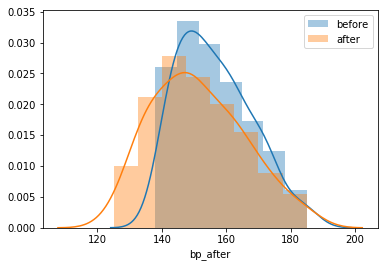

In [5]:
import seaborn as sns
sns.distplot(bp_reading.bp_before, label='before')
sns.distplot(bp_reading.bp_after, label='after')

plt.legend()

In [6]:
bp_reading.shape

(120, 5)

In [7]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


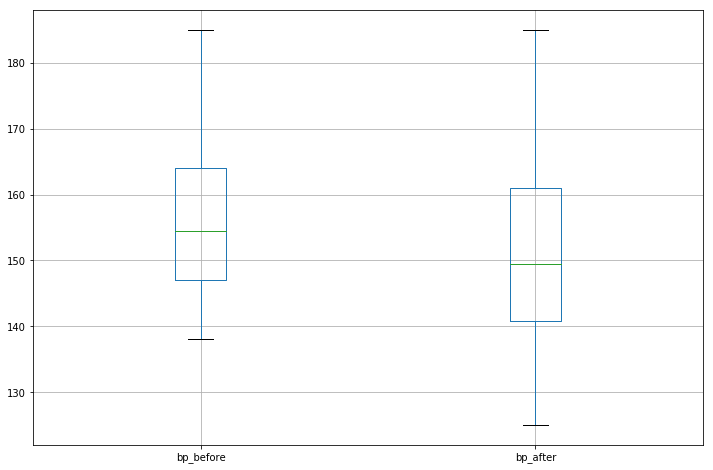

In [8]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(12, 8))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of sample 01 is equal to the mean of sample 02__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of sample 01 is not equal to sample 02__ 

In [9]:
stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [11]:
stats.ttest_1samp(bp_reading['bp_after'] - bp_reading['bp_before'], 0)

Ttest_1sampResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

**Note:-** __Here, `t-test = -3.337` and `p-value = 0.0011` since p-value is less than the significant value hence null-hypothesis is rejected`(Alpha = 0.05)`__

### T-test using `researchpy`
https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [12]:
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'], 
         paired = True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000
